In [20]:
import os
import pandas as pd

# Define the path to the STA file
folder_path = "C:/Users/Zohd/Desktop/STA-160/Nepal/Nepal/Nepal 2022/NP_2022_DHS_11092023_2251_202866/NPHR82DT/"
file_name = "NPHR82FL.DTA"
sta_file_path = os.path.join(folder_path, file_name)  

# Check if the file exists
if os.path.exists(sta_file_path):
    # Read the STA file into a pandas DataFrame
    df = pd.read_stata(sta_file_path)
    
    # Display information about the DataFrame
    #print("DataFrame Info:")
   # print(df.info())
    
    # Display the DataFrame
   # print("\nContents of the STA file:")
    #print(df)
    #print(df.columns.tolist())
    print(df['hv106_01'])
    

else:
    print(f"The file {file_name} does not exist in the specified folder.")


0                                                    basic
1                                                    basic
2        no education, preschool/early childhood education
3        no education, preschool/early childhood education
4        no education, preschool/early childhood education
                               ...                        
13781    no education, preschool/early childhood education
13782                                                basic
13783    no education, preschool/early childhood education
13784                                                basic
13785    no education, preschool/early childhood education
Name: hv106_01, Length: 13786, dtype: category
Categories (5, object): ['no education, preschool/early childhood educa... < 'basic' < 'secondary' < 'higher' < 'don't know']


C:\Users\Zohd\AppData\Local\Temp\ipykernel_11384\2524357902.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['RoomProp'] = df["hv009"] / df["hv216"]


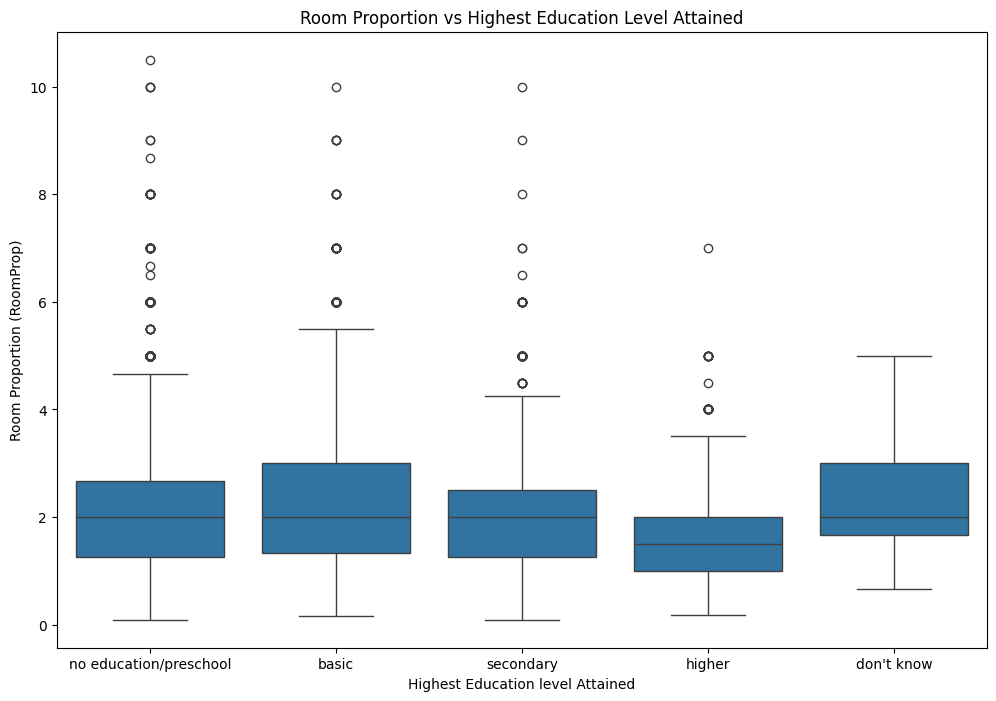

ANOVA test between RoomProp and hv106_01: F-statistic = 31.836450844648734, p-value = 1.9097802794526754e-26
                Multiple Comparison of Means - Tukey HSD, FWER=0.05                 
        group1                 group2         meandiff p-adj   lower   upper  reject
------------------------------------------------------------------------------------
                 basic             don't know   0.1637 0.9599 -0.4886  0.8159  False
                 basic                 higher  -0.4729    0.0 -0.6195 -0.3263   True
                 basic no education/preschool  -0.0457 0.2999 -0.1102  0.0188  False
                 basic              secondary  -0.2164    0.0 -0.2907 -0.1422   True
            don't know                 higher  -0.6365 0.0687  -1.302  0.0289  False
            don't know no education/preschool  -0.2094 0.9059 -0.8617  0.4429  False
            don't know              secondary  -0.3801 0.5057 -1.0334  0.2733  False
                higher no education/presc

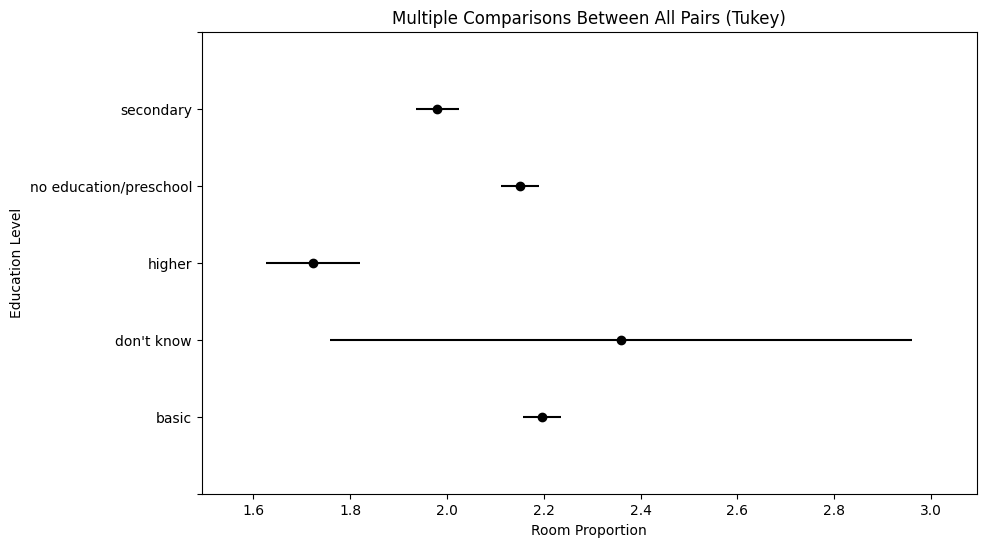

In [21]:
#Importing Neccesary Modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd

#Creating RoomProp as a new column in df
df['RoomProp'] = df["hv009"] / df["hv216"]

# Dropping NaN values from df to create df_cleaned1
#df_cleaned1 = df.dropna(subset=['RoomProp', 'hv106_01'])

# Replacing the combined category with 'No Education/Preschool'
df['hv106_01'] = df['hv106_01'].str.replace('no education, preschool/early childhood education', 'no education/preschool', regex=True)
# Performing the dropna operation
df_cleaned1 = df.dropna(subset=['RoomProp', 'hv106_01'])
#Creating list of education_levels to use in future plotting and analysis
education_levels = ['no education/preschool', 'basic', 'secondary', 'higher', "don't know"]
#Setting Education variable as a categorical variable with the categories as the education_levels list
df_cleaned1['hv106_01'] = pd.Categorical(df_cleaned1['hv106_01'], categories=education_levels, ordered=True)


# Creating a boxplot to visualize the data
#Assigning appropriate size to boxplot
plt.figure(figsize=(12, 8))
# Creating a boxplot to visualize the data with x as education variable and y as Roomprop variable
sns.boxplot(x='hv106_01', y='RoomProp', data=df_cleaned1, order=education_levels)
#Setting title to the boxplot
plt.title('Room Proportion vs Highest Education Level Attained')
#Setting title to x-axis
plt.xlabel('Highest Education level Attained')
#Setting title to y-axis
plt.ylabel('Room Proportion (RoomProp)')
plt.show()
# Peforming an Anova test
anova_result = stats.f_oneway(*(df_cleaned1[df_cleaned1['hv106_01'] == level]['RoomProp'] for level in education_levels if level in df_cleaned1['hv106_01'].cat.categories))
print(f"ANOVA test between RoomProp and hv106_01: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")

# Conducting a Tukey's HSD test with an alha level of .05
tukey_result = pairwise_tukeyhsd(endog=df_cleaned1['RoomProp'],    
                                 groups=df_cleaned1['hv106_01'],    
                                 alpha=0.05)                        

# Printing the results of Tukey's test
print(tukey_result)

# Plotting the reuslts of the tukey test, but not including in the report
tukey_result.plot_simultaneous(xlabel='Room Proportion', ylabel='Education Level')
plt.show()

In [14]:
#print(df['hb66_1'].value_counts(normalize=True))
print(df_cleaned1['hv106_01'].value_counts(normalize=True))
# Subset the DataFrame for the 'no education' category
no_education_data = df[df['hv106_01'] == 'no education']['RoomProp']




hv106_01
basic           0.590997
secondary       0.344484
higher          0.061685
don't know      0.002835
no education    0.000000
preschool       0.000000
Name: proportion, dtype: float64
Descriptive statistics for 'no education':
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: RoomProp, dtype: float64
Count of observations for 'no education': 0
Descriptive statistics for 'preschool':
count    4967.000000
mean        2.150629
std         1.278240
min         0.090909
25%         1.250000
50%         2.000000
75%         2.666667
max        10.500000
Name: RoomProp, dtype: float64
Count of observations for 'preschool': 4967


In [14]:
import os
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Define the feature matrix X (predictor variable) and the target vector y (target variable)
X = df_cleaned[['RoomProp']]  # Using double brackets to create a DataFrame
y = df_cleaned['hb106']      # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rf_classifier.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy score of the model
accuracy = accuracy_score(y_test, y_pred)

# Generate a confusion matrix and classification report to evaluate the model's performance
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


NameError: name 'df_cleaned' is not defined

In [1]:
print(df['hv106_01'].shape)
print(df['RoomProp'].shape)
print(df['hb66_1'].shape)

NameError: name 'df' is not defined

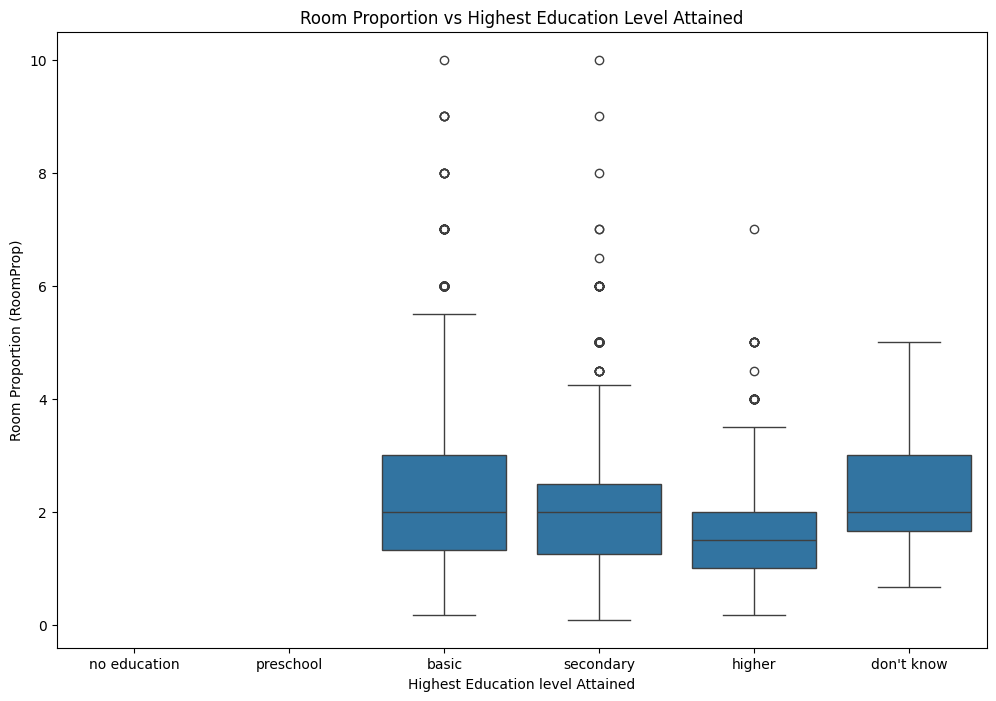

ANOVA test between RoomProp and hv106_01: F-statistic = nan, p-value = nan


C:\Users\Zohd\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


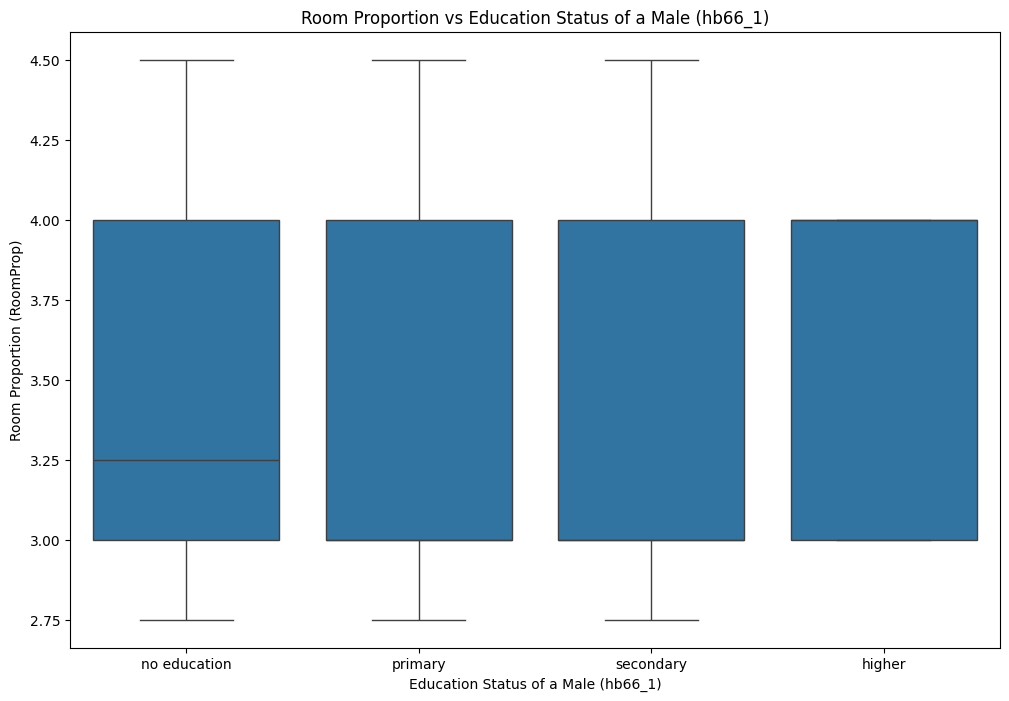

ANOVA test between RoomProp and hb66_1: F-statistic = 0.9022033688610672, p-value = 0.43979430680739184


In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Assuming df is your DataFrame
# Convert 'hb66_1' to a categorical type if it's not already.
# Replace 'education_levels' with the actual education categories in your data.
education_levels = ['no education', 'primary', 'secondary', 'higher']  # Adjust if necessary
df['hb66_1'] = pd.Categorical(df['hb66_1'], categories=education_levels, ordered=True)

# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='hb66_1', y='RoomProp', data=df, order=education_levels)
plt.title('Room Proportion vs Education Status of a Male (hb66_1)')
plt.xlabel('Education Status of a Male (hb66_1)')
plt.ylabel('Room Proportion (RoomProp)')
plt.show()

# Optionally, perform an ANOVA test
anova_result = stats.f_oneway(*(df[df['hb66_1'] == level]['RoomProp'] for level in education_levels))
print(f"ANOVA test between RoomProp and hb66_1: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Assuming df is your DataFrame
# Convert 'hb66_1' to a categorical type if it's not already.
# Replace 'education_levels' with the actual education categories in your data.
education_levels = ['no education', 'primary', 'secondary', 'higher']  # Adjust if necessary
df['hb66_1'] = pd.Categorical(df['hb66_1'], categories=education_levels, ordered=True)

# Create the boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='hb66_1', y='RoomProp', data=df, order=education_levels)
plt.title('Room Proportion vs Education Status of a Male (hb66_1)')
plt.xlabel('Education Status of a Male (hb66_1)')
plt.ylabel('Room Proportion (RoomProp)')
plt.show()

# Optionally, perform an ANOVA test
anova_result = stats.f_oneway(*(df[df['hb66_1'] == level]['RoomProp'] for level in education_levels))
print(f"ANOVA test between RoomProp and hb66_1: F-statistic = {anova_result.statistic}, p-value = {anova_result.pvalue}")
